### Machine Learning Baseline Models for Demand Forecasting

This notebook focuses on:
- Creating time-aware train-test splits
- Training classical machine learning regression models
- Evaluating performance using forecasting metrics
- Establishing baselines for comparison with deep learning models


In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

import matplotlib.pyplot as plt


In [5]:
# Load Feature-Engineered Dataset
data_path = r"C:\Multivariate_TimeSeries_Forecasting_CP2\data\raw\features.csv"
df = pd.read_csv(data_path, parse_dates=["Date"], index_col="Date")

df.shape


(382955, 33)

In [6]:
# Sort DataFrame by Store, Dept, and Date
df = df.sort_values(["Store", "Dept", "Date"])


In [7]:
# Define Target & Features - Prepare Feature Matrix and Target Vector
TARGET = "Weekly_Sales"

X = df.drop(columns=[TARGET])
y = df[TARGET]


In [9]:
# Time-Based Train-Test Split (80-20)
split_date = X.index.to_series().quantile(0.8)

X_train = X[X.index <= split_date]
X_test  = X[X.index > split_date]

y_train = y[y.index <= split_date]
y_test  = y[y.index > split_date]

X_train.shape, X_test.shape


((309231, 32), (73724, 32))

In [10]:
# Baseline Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [11]:
# Evaluate Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

rmse_lr, mape_lr


(np.float64(3269.407593528834), 266531691334484.03)

In [12]:
# Baseline Model 2: Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [13]:
# Evaluate Random Forest Regressor
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

rmse_rf, mape_rf


(np.float64(2873.2409081890182), 70536897296055.16)

In [14]:
# Summarize Results - Model Performance Comparison Table
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [rmse_lr, rmse_rf],
    "MAPE": [mape_lr, mape_rf]
})

results


,Model,RMSE,MAPE
0,Linear Regression,3269.407594,2.665317e+14
1,Random Forest,2873.240908,7.053690e+13


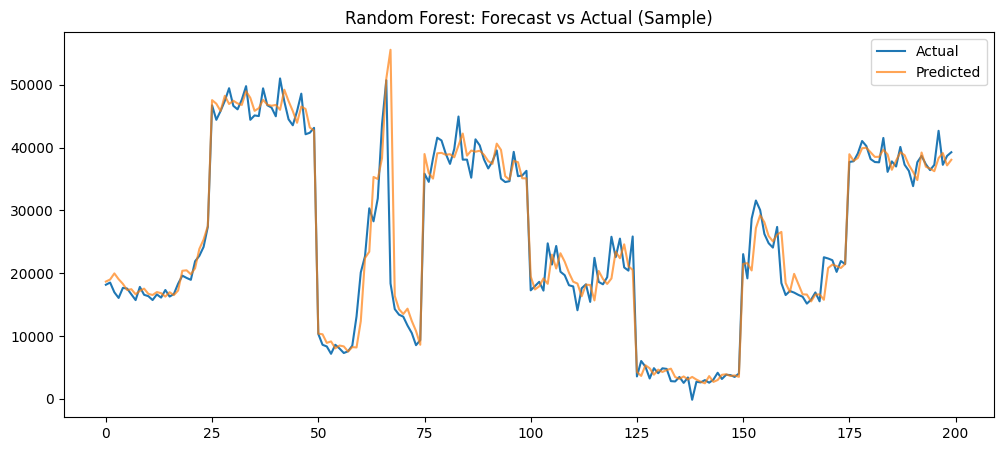

In [ ]:
# Visualize Predictions vs Actuals for Random Forest
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:200], label="Actual")
plt.plot(y_pred_rf[:200], label="Predicted", alpha=0.7)
plt.title("Random Forest: Forecast vs Actual (Sample)")
plt.legend()
plt.show()


In [16]:
# Feature Importance from Random Forest
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)


lag_1              0.750024
rolling_mean_4     0.174723
lag_4              0.014398
week               0.009139
rolling_mean_12    0.008912
MarkDown3          0.005160
lag_2              0.004854
lag_8              0.004634
day                0.003599
rolling_std_12     0.003534
dtype: float64

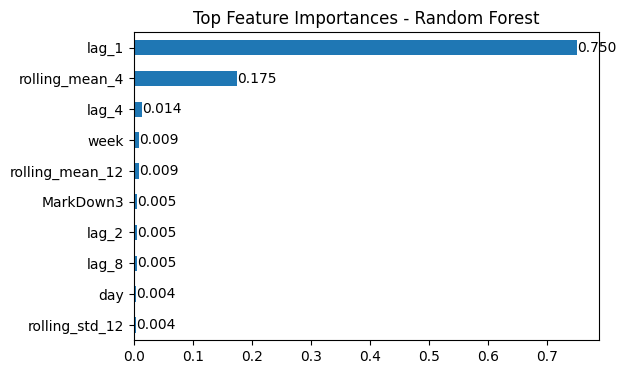

In [20]:
# Plot Top 10 Feature Importances
# Enhanced Plot with Importance Values
ax = importances.head(10).plot(kind="barh", figsize=(6,4))
plt.gca().invert_yaxis()

for i, v in enumerate(importances.head(10).values):
    ax.text(v, i, f"{v:.3f}", va="center")

plt.title("Top Feature Importances - Random Forest")
plt.show()



In [18]:
# Save the Random Forest Model
import joblib

joblib.dump(rf, "../models/ml/random_forest.pkl")
print("Random Forest model saved.")


Random Forest model saved.


### ML Baseline Summary

- Linear Regression provided a simple interpretability benchmark.
- Random Forest captured non-linear relationships and significantly improved performance.
- Lag and rolling features were among the most influential predictors.
- These ML models establish a strong baseline before applying deep learning models.

The comparison ensures that deep learning models are justified by measurable improvements.